In [1]:
!pip install pandas sklearn seaborn xgboost pandas_profiling

     |████████████████████████████████| 262 kB 685 kB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 709 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 5.2 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=5287b3d352826d40de81af73aea9a37bbfac81388e8bb30e4d1e745cb14d30a0
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=f0f7667d610f4f8363fb6494c504947005d4d7528d9c6b80755d778cfbe81d56
  Stored in directory: /home/jovyan/.cache/pip/wheels/51/f9/a5/740af2fdb0ad1edf79aabdc41531be0

In [2]:
import pandas as pd                  
import numpy as np  
import seaborn as sns
import matplotlib 
from pandas_profiling import ProfileReport
import pathlib
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline


In [3]:
df = pd.read_csv(r"https://raw.githubusercontent.com/medinaltbx/G6_DP3/master/data/input/merged_data/train/merged_train.csv", sep=';' , decimal='.')
df, labels = df.drop(['customerid'], axis=1), df['customerid']
df=df.astype(int)

In [ ]:
# profile = ProfileReport(df, title='Pandas Profiling Report for ', explorative=True, vars={"num": {"low_categorical_threshold": 0}} )
# profile.to_file("profile.html")

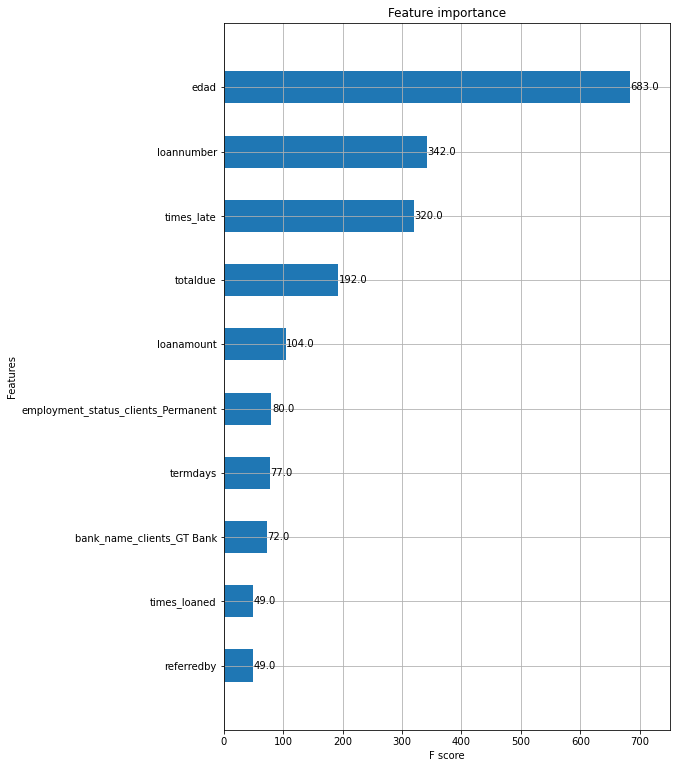

In [19]:
X, y = df.drop(["good_bad_flag"],axis=1), df['good_bad_flag']
model = xgb.XGBClassifier()
model.fit(X, y)
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, height=0.5, ax=ax, max_num_features=10)
plt.show()

In [21]:
final_cols = ["edad","loannumber","times_late","totaldue","loanamount","employment_status_clients_Permanent",
              "termdays","bank_name_clients_GT Bank","times_loaned","referredby"]
filtered_merged = df[final_cols]
filtered_merged

,edad,loannumber,times_late,totaldue,loanamount,employment_status_clients_Permanent,termdays,bank_name_clients_GT Bank,times_loaned,referredby
0,48,2,0,13000,10000,0,30,1,1,1
1,36,2,1,13000,10000,1,30,0,1,0
2,35,4,2,13000,10000,0,30,0,3,0
3,30,2,1,11500,10000,1,15,1,1,0
4,31,6,2,24500,20000,1,30,0,5,0
...,...,...,...,...,...,...,...,...,...,...
3272,39,3,0,11500,10000,1,15,1,2,0
3273,36,3,1,11500,10000,0,15,1,2,0
3274,38,11,3,44000,40000,0,30,0,10,0
3275,36,7,3,24500,20000,1,30,0,6,0


In [23]:
filtered_merged.to_csv("/home/jovyan/work/data/input/merged_data/train/top_10_train.csv",sep=';',encoding='utf8',index=False)

In [27]:
# Extraemos las variables también del dataset de test
df_test = pd.read_csv(r"https://raw.githubusercontent.com/medinaltbx/G6_DP3/master/data/input/merged_data/test/merged_test.csv", sep=';' , decimal='.')
filtered_merged_test = df_test[final_cols]
filtered_merged_test["customerid"] = df_test["customerid"]
filtered_merged_test.to_csv("/home/jovyan/work/data/input/merged_data/test/top_10_test.csv",sep=';',encoding='utf8',index=False)

<ipython-input-27-d3a2a68098e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_test["customerid"] = df_test["customerid"]
